<h1 align='center'>Classification Animal Faces</h1>
<h1 align='center'>AlexNet With Traditional Machine Learning Algorithm</h1>

# Download Data From Driver

In [ ]:
%cd '/content'
!gdown https://drive.google.com/uc?id=1uG05PyClwmZWgxYdUFztDYUB7GMZ8L-a

/content
Downloading...
From: https://drive.google.com/uc?id=1uG05PyClwmZWgxYdUFztDYUB7GMZ8L-a
To: /content/Animal Face Dataset.zip
100% 127M/127M [00:01<00:00, 104MB/s] 


In [ ]:
!unzip '/content/Animal Face Dataset.zip'

#Import library

In [ ]:
from __future__ import print_function
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torchsummary import summary
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.9.0+cu111
Torchvision Version:  0.10.0+cu111


# Load data and preprocess

In [ ]:
data_transforms = {
    '/content/Animal Face Dataset': transforms.Compose([
        transforms.ToTensor()
    ]),
}

data_dir = '/content/Animal Face Dataset'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir,x),data_transforms[x])
                    for x in ['/content/Animal Face Dataset']}

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=128, shuffle=True, num_workers=4)
                for x in ['/content/Animal Face Dataset']}
                     
dataset_sizes = {x: len(image_datasets[x]) for x in ['/content/Animal Face Dataset']}
class_names = image_datasets['/content/Animal Face Dataset'].classes

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class_names

['cat', 'dog', 'fox', 'lion', 'tiger', 'wolf']

In [ ]:
dataset_sizes

{'/content/Animal Face Dataset': 2763}

#Use AlexNet To Feature Selection

In [ ]:
alexnet = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
summary(alexnet,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
class AlexNet_custom(nn.Module):
  def __init__(self):
    super(AlexNet_custom, self).__init__()
    self.features = nn.Sequential(*list(alexnet.features.children()))
    self.avgpool = alexnet.avgpool
    self.classifier = nn.Sequential(*list(alexnet.classifier.children())[: -2])

  def forward(self,x):
    x = self.features(x)
    x = self.avgpool(x)
    x = x.view(x.size(0), -1) # Flatten
    x = self.classifier(x)
    return x


In [ ]:
model_Alexnet = AlexNet_custom()

In [ ]:
summary(model_Alexnet,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 55, 55]          23,296
              ReLU-2           [-1, 64, 55, 55]               0
         MaxPool2d-3           [-1, 64, 27, 27]               0
            Conv2d-4          [-1, 192, 27, 27]         307,392
              ReLU-5          [-1, 192, 27, 27]               0
         MaxPool2d-6          [-1, 192, 13, 13]               0
            Conv2d-7          [-1, 384, 13, 13]         663,936
              ReLU-8          [-1, 384, 13, 13]               0
            Conv2d-9          [-1, 256, 13, 13]         884,992
             ReLU-10          [-1, 256, 13, 13]               0
           Conv2d-11          [-1, 256, 13, 13]         590,080
             ReLU-12          [-1, 256, 13, 13]               0
        MaxPool2d-13            [-1, 256, 6, 6]               0
AdaptiveAvgPool2d-14            [-1, 25


#Feature Extraction

In [ ]:
a = torch.tensor([])
b = torch.tensor([])
with torch.no_grad():
  for inputs, labels in dataloaders['/content/Animal Face Dataset']:
    model_Alexnet.eval()
    out=model_Alexnet(inputs)
    print(out.size())
    a = torch.cat((a,out),dim=0)
    b=torch.cat((b,labels),dim=0)
a= a.numpy()
b=b.numpy()

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([128, 4096])
torch.Size([75, 4096])


#Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(a,b,test_size=0.33, random_state=42)


# Training and Evaluation Model

## Function Plot Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Model Support Vector Machine(SVM)

In [ ]:
from sklearn import svm
svm_model=svm.SVC()
svm_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predict=svm_model.predict(X_test)

              precision    recall  f1-score   support

         cat       0.95      0.94      0.95       158
         dog       0.95      0.89      0.92       150
         fox       0.84      0.89      0.87       151
        lion       0.98      0.98      0.98       148
       tiger       0.99      0.99      0.99       152
        wolf       0.90      0.92      0.91       153

    accuracy                           0.93       912
   macro avg       0.94      0.93      0.93       912
weighted avg       0.94      0.93      0.93       912



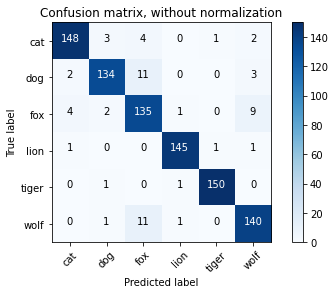

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predict, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

#Model LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = logistic_regression_model.predict(X_test)

              precision    recall  f1-score   support

         cat       0.97      0.95      0.96       158
         dog       0.96      0.93      0.94       150
         fox       0.89      0.97      0.93       151
        lion       0.97      0.99      0.98       148
       tiger       0.99      0.99      0.99       152
        wolf       0.97      0.93      0.95       153

    accuracy                           0.96       912
   macro avg       0.96      0.96      0.96       912
weighted avg       0.96      0.96      0.96       912



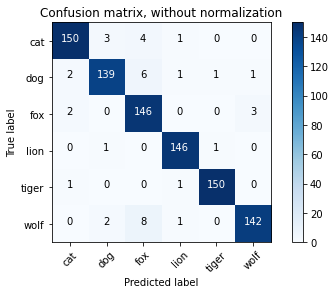

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_predict, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')